In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive/My\ Drive/training

/content/drive/My Drive/training


In [0]:
import os

print(os.listdir())

['p019340.psv', 'p019339.psv', 'p019338.psv', 'p019341.psv', 'p019342.psv', 'p019345.psv', 'p019344.psv', 'p019351.psv', 'p019347.psv', 'p019349.psv', 'p019348.psv', 'p019343.psv', 'p019346.psv', 'p019350.psv', 'p019352.psv', 'p019358.psv', 'p019354.psv', 'p019355.psv', 'p019356.psv', 'p019353.psv', 'p019357.psv', 'p019360.psv', 'p019361.psv', 'p019359.psv', 'p019362.psv', 'p019365.psv', 'p019367.psv', 'p019370.psv', 'p019369.psv', 'p019364.psv', 'p019368.psv', 'p019363.psv', 'p019371.psv', 'p019366.psv', 'p019372.psv', 'p019373.psv', 'p019379.psv', 'p019375.psv', 'p019378.psv', 'p019377.psv', 'p019376.psv', 'p019381.psv', 'p019380.psv', 'p019374.psv', 'p019382.psv', 'p019383.psv', 'p019387.psv', 'p019389.psv', 'p019386.psv', 'p019388.psv', 'p019384.psv', 'p019385.psv', 'p019391.psv', 'p019390.psv', 'p019392.psv', 'p019393.psv', 'p019401.psv', 'p019399.psv', 'p019395.psv', 'p019394.psv', 'p019397.psv', 'p019396.psv', 'p019398.psv', 'p019400.psv', 'p019402.psv', 'p019405.psv', 'p019408.

In [0]:
columns = pd.read_csv(os.listdir()[0],sep='|').columns
print(columns)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


In [0]:
counts = dict(zip(columns,[0 for i in range(len(columns))]))
j=0
for psv in os.listdir():
  if(j>5000):
    break
  print(j,end=' ')
  df = pd.read_csv(psv,sep='|')
  count_vals = df.count().values

  for i in range(len(count_vals)):
    if(count_vals[i]>=10):
      counts[columns[i]]+=1
  j+=1

print(counts)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-20fcb1740100>", line 7, in <module>
    df = pd.read_csv(psv,sep='|')
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 685, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 457, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 895, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1135, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1917, in __init__
    self._reader = parsers.TextReader(src, **kwds)
KeyboardInterr

KeyboardInterrupt: ignored

In [0]:
reduced_features = []
for x in counts:
  if counts[x]>2700:
    reduced_features.append(x)

print(reduced_features)
print(len(reduced_features))


['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel']
12


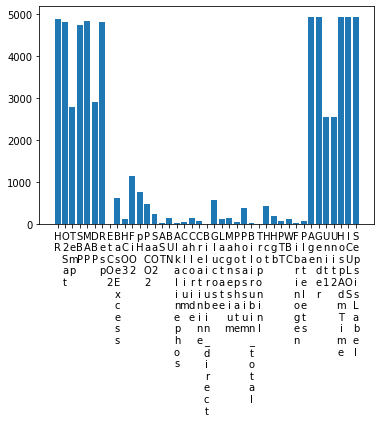

In [0]:
from textwrap import wrap
plt.bar(range(len(counts)), list(counts.values()), align='center')
labels = ['\n'.join(wrap(x, 1)) for x in columns]
plt.xticks(range(len(counts)), labels=labels)

plt.show()

In [0]:
unwanted_features = list(set(columns)-set(reduced_features))
print(unwanted_features)

['AST', 'EtCO2', 'HCO3', 'Hct', 'PTT', 'Glucose', 'Magnesium', 'Chloride', 'Bilirubin_direct', 'Calcium', 'TroponinI', 'Bilirubin_total', 'Unit1', 'Creatinine', 'FiO2', 'WBC', 'Potassium', 'pH', 'Unit2', 'Alkalinephos', 'Hgb', 'Phosphate', 'BaseExcess', 'BUN', 'Platelets', 'Fibrinogen', 'SaO2', 'Lactate', 'PaCO2']


In [0]:
X,y = [],[]

In [0]:
x_analysis = []

In [0]:
filenum =  0  
for psv in os.listdir():

  df = pd.read_csv(psv,sep='|')
  
  df.drop(labels=unwanted_features,axis=1,inplace=True)

  seps = df['SepsisLabel']

  df.drop(['SepsisLabel'],axis=1,inplace=True)

  df.dropna(thresh=6,how='all',inplace=True)
  x_analysis.append(df.mean())
  df.fillna(df.median(),inplace=True)
  df.fillna(0,inplace=True)
  length = len(df)
  if(length<15):
    continue
  
  sums = seps.sum()
  if sums:
    y.append(1)
  else:
    y.append(0)

  if(length>=30):
    X.append(df[length-30:].values)
  else:
    temp_df = pd.DataFrame(dict(zip(df.columns,np.zeros((11,30-length),dtype=np.float32))))
    temp_df = pd.concat([temp_df,df],axis=0)
    X.append(temp_df.values)

  print(filenum,end=' ')
  filenum+=1
  

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [0]:
print(len(X),len(y))

18858 18858


In [0]:
%pwd
%cd ..

/content/drive/My Drive


In [0]:
%cd training_setB/

/content/drive/My Drive/training_setB


In [0]:
filenum =  0  
for psv in os.listdir():

  df = pd.read_csv(psv,sep='|')
  
  df.drop(labels=unwanted_features,axis=1,inplace=True)

  seps = df['SepsisLabel']

  df.drop(['SepsisLabel'],axis=1,inplace=True)

  df.dropna(thresh=6,how='all',inplace=True)
  x_analysis.append(df.mean())
  df.fillna(df.median(),inplace=True)
  df.fillna(0,inplace=True)
  length = len(df)
  if(length<15):
    continue

  sums = seps.sum()
  if sums:
    y.append(1)
  else:
    y.append(0)

  if(length>=30):
    X.append(df[length-30:].values)
  else:
    temp_df = pd.DataFrame(dict(zip(df.columns,np.zeros((11,30-length),dtype=np.float32))))
    temp_df = pd.concat([temp_df,df],axis=0)
    X.append(temp_df.values)

  print(filenum,end=' ')
  filenum+=1
  

In [0]:
print(len(X),len(y))

36066 36066


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3260a44898>,
      dtype=object)

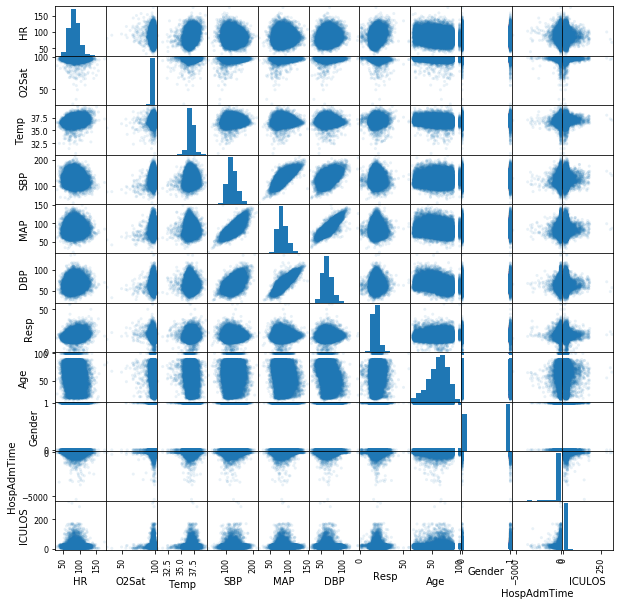

In [0]:
from pandas.plotting import scatter_matrix

df_analysis = pd.DataFrame(x_analysis)

scatter_matrix(df_analysis,alpha=0.1,figsize=(10,10))

In [0]:
for feat in df_analysis.columns:
  sns.boxplot(df_analysis[feat])
  plt.show()

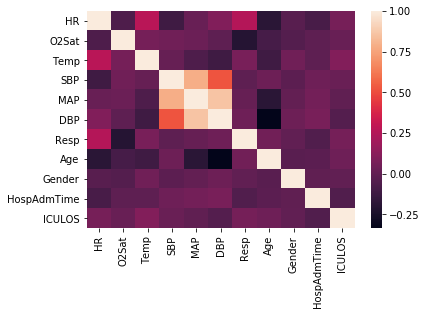

In [0]:
import seaborn as sns
corr = df_analysis.corr()

sns.heatmap(corr)
plt.show()

In [0]:
xs = np.array(X)
ys= np.array(y)
print(xs.shape,ys.shape)

(36066, 30, 11) (36066,)


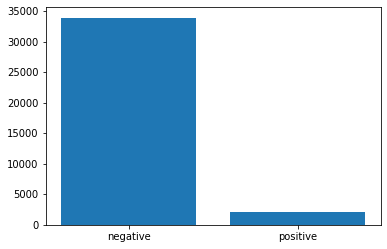

In [0]:
unique, counts = np.unique(ys, return_counts=True)
compare = dict(zip(unique,counts))
labels = ['negative','positive']
plt.bar(unique,counts)
plt.xticks(unique,labels)
plt.show()

In [0]:
print(unique,counts)

[0 1] [33909  2157]


In [0]:
y_temp = []
for yp in ys:
  if yp==0:
    y_temp.append([1,0])
  else:
    y_temp.append([0,1])

y_temp = np.array(y_temp)
print(y_temp.shape)

(36066, 2)


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xs,y_temp,test_size=0.25,random_state=42)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27049, 30, 11)
(9017, 30, 11)
(27049, 2)
(9017, 2)


In [0]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1]
[0 1]


In [0]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

In [0]:

model = Sequential()
model.add(LSTM(128,input_shape=(30,11),return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 30, 128)           71680     
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 211,650
Trainable params: 211,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=1, validation_split=0.2, shuffle=True)

Train on 21639 samples, validate on 5410 samples
Epoch 1/3
21639/21639 [==============================] - 70s 3ms/step - loss: 0.0436 - acc: 0.9521 - val_loss: 0.0423 - val_acc: 0.9540
Epoch 2/3
21639/21639 [==============================] - 70s 3ms/step - loss: 0.0401 - acc: 0.9559 - val_loss: 0.0412 - val_acc: 0.9549
Epoch 3/3
21639/21639 [==============================] - 69s 3ms/step - loss: 0.0385 - acc: 0.9574 - val_loss: 0.0364 - val_acc: 0.9606


In [0]:
%cd ..
%cd ..
%cd ..


/content/drive/My Drive
/content/drive
/content


In [0]:
model.save('model.h5')

In [0]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)

In [0]:
print(y_pred)

[[0.97803307 0.02196691]
 [0.9659855  0.03401458]
 [0.98403615 0.0159638 ]
 ...
 [0.9804205  0.01957957]
 [0.9801194  0.01988051]
 [0.9785041  0.02149591]]


In [0]:
cnt = 0
for x in y_pred:
  if(x[0]<x[1]):
    cnt+=1
print(cnt)

253


In [0]:
print(y_test)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [0]:
y_preds = [np.argmax(ys) for ys in y_pred]
y_act = [np.argmax(ys) for ys in y_test]

acc = accuracy_score(y_preds,y_act)
print(acc)

0.959077298436287


In [0]:
print(np.unique(y_preds,return_counts=True))
print(np.unique(y_act,return_counts=True))


(array([0, 1]), array([8764,  253]))
(array([0, 1]), array([8503,  514]))
